In [1]:
!python --version

Python 3.10.9


In [2]:
import adelio            as aio
import matplotlib.pyplot as plt
import numpy             as np
import os
import preprocessing     as pre
import processing        as pro

Eyy description :
-----------------
shape : (1328, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535

Img description :
-----------------
shape : (1328, 1328)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.00977957105607421
std   : 0.006517129751071644

Autocorrelation description :
-----------------------------
shape : (1328, 1328)
type  : float64
NaN   : False
min   : 0.6014444910921535
max   : 1.0
mean  : 0.6924765721123184
std   : 0.031466510631978035


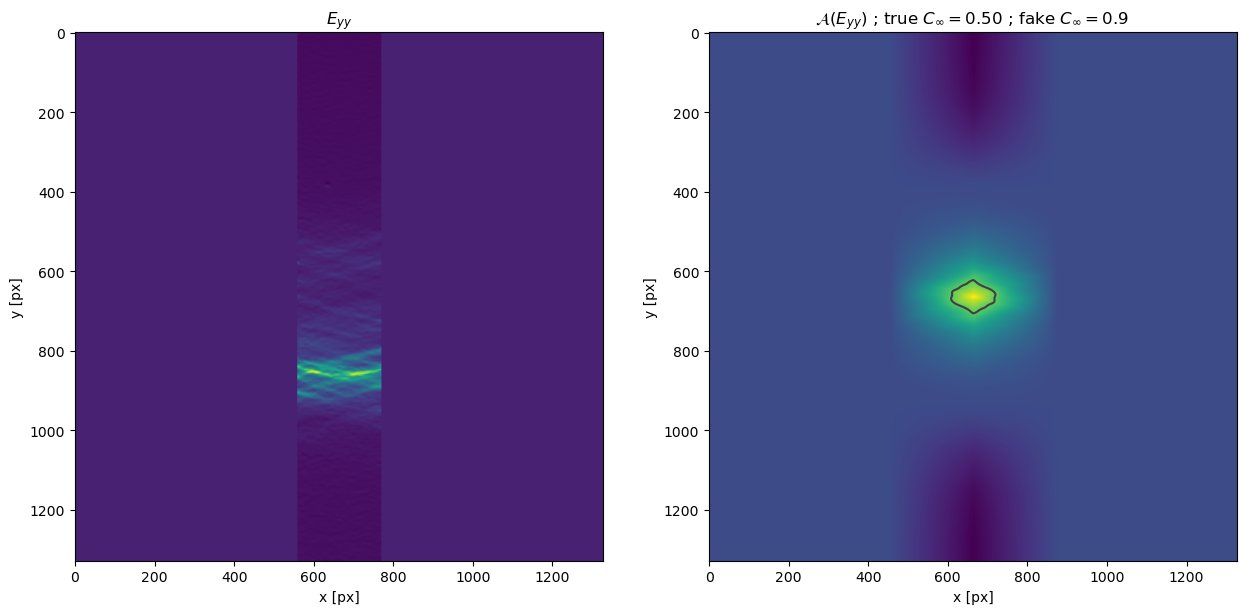

In [3]:
path = os.path.join("C:\\Users", "julie", "Documents", "experiences", "S18_Eyy_point679.csv")
eyy  = np.genfromtxt( path, delimiter=',' )
eyy  = eyy[np.logical_not(np.isnan(eyy).any(axis=1))]

print("Eyy description :")
print("-----------------")
print(f"shape : {eyy.shape}")
print(f"type  : {eyy.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy))}")
print(f"min   : {np.nanmin(eyy)}")
print(f"max   : {np.nanmax(eyy)}")
print(f"mean  : {np.nanmean(eyy)}")
print(f"std   : {np.nanstd(eyy)}")


l = min(eyy.shape)
L = max(eyy.shape)
eyy_img = np.ones((L,L), dtype=np.float64) *np.nanmean(eyy)
eyy_img[:, (L-l)//2:(L+l)//2] = eyy

print()
print("Img description :")
print("-----------------")
print(f"shape : {eyy_img.shape}")
print(f"type  : {eyy_img.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy_img))}")
print(f"min   : {np.nanmin(eyy_img)}")
print(f"max   : {np.nanmax(eyy_img)}")
print(f"mean  : {np.nanmean(eyy_img)}")
print(f"std   : {np.nanstd(eyy_img)}")


eyy_auto = pro.autocorrelation(eyy_img)
eyy_cinf = pro.cinf(eyy_img)

print()
print("Autocorrelation description :")
print("-----------------------------")
print(f"shape : {eyy_auto.shape}")
print(f"type  : {eyy_auto.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy_auto))}")
print(f"min   : {np.nanmin(eyy_auto)}")
print(f"max   : {np.nanmax(eyy_auto)}")
print(f"mean  : {np.nanmean(eyy_auto)}")
print(f"std   : {np.nanstd(eyy_auto)}")

fig = plt.figure(figsize=(15,7))
axe = fig.add_subplot(1, 2, 1)
axe.imshow(eyy_img)
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$E_{yy}$")

axe = fig.add_subplot(1, 2, 2)
axe.imshow(eyy_auto)
axe.contour(eyy_auto, [eyy_cinf, 0.90, 1], cmap="Greys")
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$\mathcal{A}(E_{yy})$ ; true $C_\infty =$"+"{:.2f}".format(eyy_cinf)+" ; fake $C_\infty = 0.9$ ")
plt.show()

I2e description :
-----------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195

J2e description :
-----------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195

Autocorrelation description :
-----------------------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195


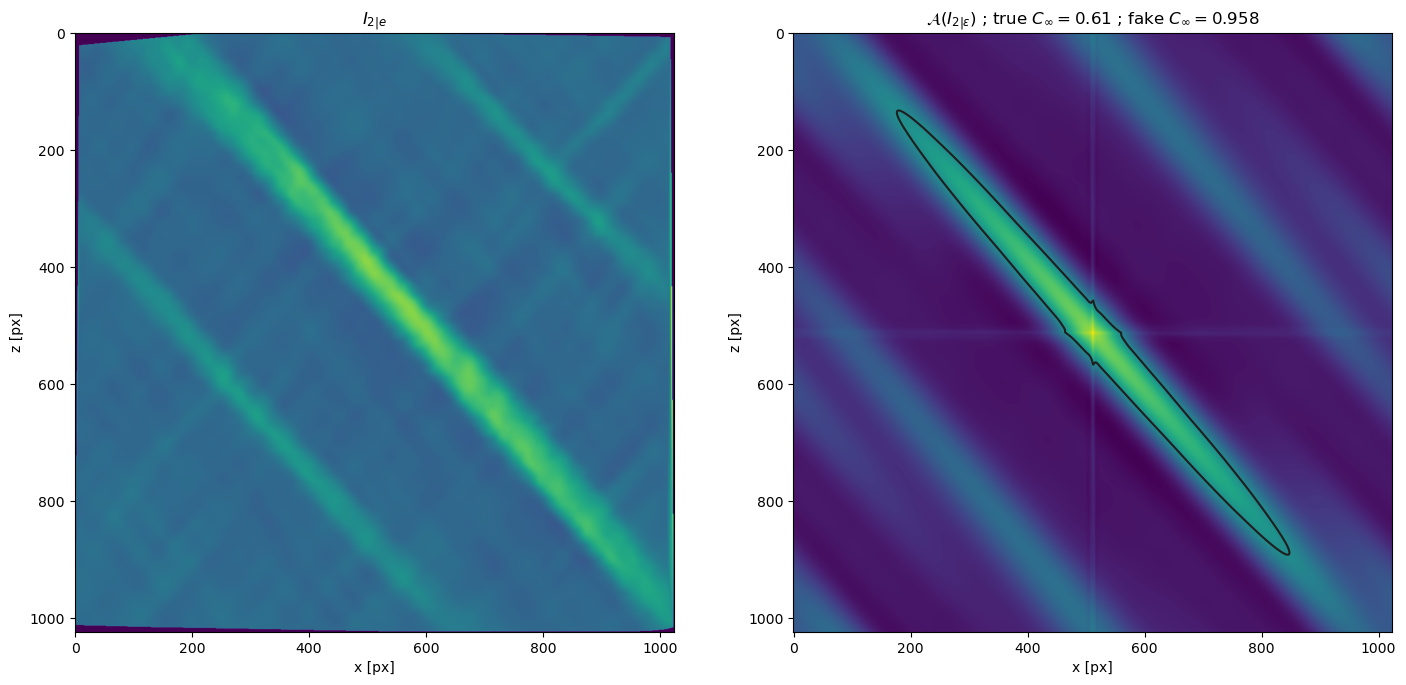

In [4]:
basepath = os.path.join("C:\\Users", "julie", "Documents", "test_deia_Nov2022", "E11_rect_P2_0.5GPa_init0_neigh1_time10_dtup5000_500000_1000K_Zfree_WR7_4e_6_PNew1.5e9_long")
ppath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("p")]))
tpath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("t")]))


tfile = aio.Tfile(tpath)
pfile = aio.Pfile(ppath)


it = len(tfile.read())-1    # number of snaps in the source, i.e the index of the last one


i2e_img, j2e_img = pre.field2pic(pfile, "e", it)


print("I2e description :")
print("-----------------")
print(f"shape : {i2e_img.shape}")
print(f"type  : {i2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(i2e_img))}")
print(f"min   : {np.nanmin(i2e_img)}")
print(f"max   : {np.nanmax(i2e_img)}")
print(f"mean  : {np.nanmean(i2e_img)}")
print(f"std   : {np.nanstd(i2e_img)}")
print()
print("J2e description :")
print("-----------------")
print(f"shape : {j2e_img.shape}")
print(f"type  : {j2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(j2e_img))}")
print(f"min   : {np.nanmin(j2e_img)}")
print(f"max   : {np.nanmax(j2e_img)}")
print(f"mean  : {np.nanmean(j2e_img)}")
print(f"std   : {np.nanstd(j2e_img)}")


i2e_auto = pro.autocorrelation(i2e_img)
i2e_cinf = pro.cinf(i2e_img)

print()
print("Autocorrelation description :")
print("-----------------------------")
print(f"shape : {i2e_img.shape}")
print(f"type  : {i2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(i2e_img))}")
print(f"min   : {np.nanmin(i2e_img)}")
print(f"max   : {np.nanmax(i2e_img)}")
print(f"mean  : {np.nanmean(i2e_img)}")
print(f"std   : {np.nanstd(i2e_img)}")

fig = plt.figure(figsize=(17,8))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(i2e_img)
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$I_{2|e}$")

axe = fig.add_subplot(1, 2, 2)
axe.imshow(i2e_auto)
axe.contour(i2e_auto, [i2e_cinf, 0.958, 1.], cmap="Greys")
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$\mathcal{A}(I_{2|\\varepsilon})$ ; true $C_\infty=$"+"{:.2f}".format(i2e_cinf)+" ; fake $C_\infty = 0.958$")

plt.show()

# Spatial analysis : length and witdh versus angle

## First try : for each couple $(y_i, x_j)$, find the intersection with $C_\infty$, then compute the norm and the angle.

In [5]:
def detect_contour(auto: np.ndarray, cinf: float) -> tuple:
    
    # Coordinates of the center of the image [px]
    x0 = np.int_(auto.shape[1]/2)
    y0 = np.int_(auto.shape[0]/2)

    # Couples of integers : (idy, idx) if auto[idy, idx] > cinf
    mask = np.argwhere(auto >= cinf)

    # Norm [px], argument [°] of these couple of points
    norm = np.sqrt( np.power(mask[:, 0]-y0, 2) + np.power(mask[:, 1]-x0, 2) )
    angl = np.arctan(mask[:, 1] /mask[:, 0]) *180 /np.pi

    return (norm, angl)

In [6]:
norm, angl = detect_contour(i2e_auto, 0.95)

print("Angle description :")
print("-------------------")
print(f"shape : {angl.shape}")
print(f"type  : {angl.dtype}")
print(f"NaN   : {np.any(np.isnan(angl))}")
print(f"min   : {np.nanmin(angl)}")
print(f"max   : {np.nanmax(angl)}")
print(f"mean  : {np.nanmean(angl)}")
print(f"std   : {np.nanstd(angl)}")

Angle description :
-------------------
shape : (78020,)
type  : float64
NaN   : False
min   : 26.452926507073155
max   : 90.0
mean  : 46.36774200979979
std   : 4.667245867007219


C:\Users\julie\AppData\Local\Temp\ipykernel_13976\4258762392.py:12: RuntimeWarning: divide by zero encountered in divide
  angl = np.arctan(mask[:, 1] /mask[:, 0]) *180 /np.pi


In [7]:
np.unique(angl).shape

(52187,)

## Second try : for each $\theta \in (0, \frac{\pi}{2})$, find the intersection with $C_\infty$, then compute the norm

In [8]:
i2e_cinf = 0.95

t = np.pi /4.

j_ = np.linspace(0, 511, 512).astype(np.int32)
i_ = np.round(j_ *np.power(np.tan(t), 1)).astype(np.int32)

print(f"shape  : {i_.shape}")
print(f"min    : {i_.min()}")
print(f"max    : {i_.max()}")
print(f"Head   : {i_[:10]}")
print(f"Tail   : {i_[-10:]}")

for i, j in zip(i_, j_):
    if i2e_auto[512-i, 512+j] >= i2e_cinf:
        continue
    else:
        norm = np.sqrt( (i)**2 + (j)**2 )
        break

print(i)
print(j)
print(i2e_auto[512-i, j+512])
print(norm)

shape  : (512,)
min    : 0
max    : 511
Head   : [0 1 2 3 4 5 6 7 8 9]
Tail   : [502 503 504 505 506 507 508 509 510 511]
28
28
0.9487233576796165
39.59797974644666


## In the second quadrant now : $\theta \in (\frac{\pi}{2};\pi)$

In [9]:
t = 3 *np.pi /4.
t = np.pi -t

j_ = np.linspace(511, 0, 512).astype(np.int32)
i_ = np.round(j_ *np.tan(t)).astype(np.int32)

for i, j in zip(i_, j_):
    if i2e_auto[512-i, 512-j] >= i2e_cinf:
        continue
    else:
        norm = np.sqrt( (i)**2 + (j)**2 )
        break

print(i)
print(j)
print(i2e_auto[512-i, 512-j])
print(norm)

511
511
0.9414910354964144
722.6631303726516


## Implementation

This function computes the distance between the center of the picture and the level $C_\infty$ in the direction defined by an angle $\theta \in (0, \pi)$.

In [10]:
def length_vs_angle(auto: np.ndarray, cinf: float, angle: float) -> float:
    length = 0.0

    N = auto.shape[0]
    
    if angle < 0:
        raise NotImplementedError
    
    elif angle > np.pi:
        raise NotImplementedError
    
    elif angle < np.pi /2.:
        j_ = np.linspace(0, N/2-1, int(N/2)).astype(np.int32)
        i_ = np.round(j_ *np.tan(angle)).astype(np.int32)

        j_ = j_[i_ < N//2]
        i_ = i_[i_ < N//2]

        for i, j in zip(i_, j_):
            if auto[N//2-i, N//2+j] >= cinf:
                continue
            else:
                length = np.sqrt( (i)**2 + (j)**2 )
                break

    else:
        angle = np.pi -angle
        j_ = np.linspace(N/2-1, 0, int(N/2)).astype(np.int32)
        i_ = np.round(j_ *np.tan(angle)).astype(np.int32)

        j_ = j_[i_ < N//2]
        i_ = i_[i_ < N//2]

        for i, j in zip(i_, j_):
            if auto[N//2-i, N//2-j] >= cinf:
                continue
            else:
                length = np.sqrt( (i)**2 + (j)**2 )
                break
    
    return length

## Application to the simulation

In [11]:
i2e_cinf = 0.96

angles = np.linspace(0, np.pi, 128)
length = np.zeros_like(angles)

for i, angle in enumerate(angles):
    length[i] = length_vs_angle(i2e_auto, i2e_cinf, angle)

print(f"shape  : {length.shape}")
print(f"NaNs   : {np.any(np.isnan(length))}")
print(f"mean   : {length.mean()}")
print(f"min    : {length.min()}")
print(f"argmin : {length.argmin()}")
print(f"angle  : {angles[length.argmin()]*180/np.pi}")
print(f"max    : {length.max()}")
print(f"argmax : {length.argmax()}")
print(f"angle  : {angles[length.argmax()]*180/np.pi}°")

shape  : (128,)
NaNs   : False
mean   : 303.95368151640037
min    : 30.4138126514911
argmin : 31
angle  : 43.93700787401575
max    : 718.4330170586538
argmax : 95
angle  : 134.64566929133858°


min  : 43.93700787401575 [°] ; 30.4138126514911 [px]
max  : 134.64566929133858 [°] ; 718.4330170586538 [px]
diff : 90.70866141732282


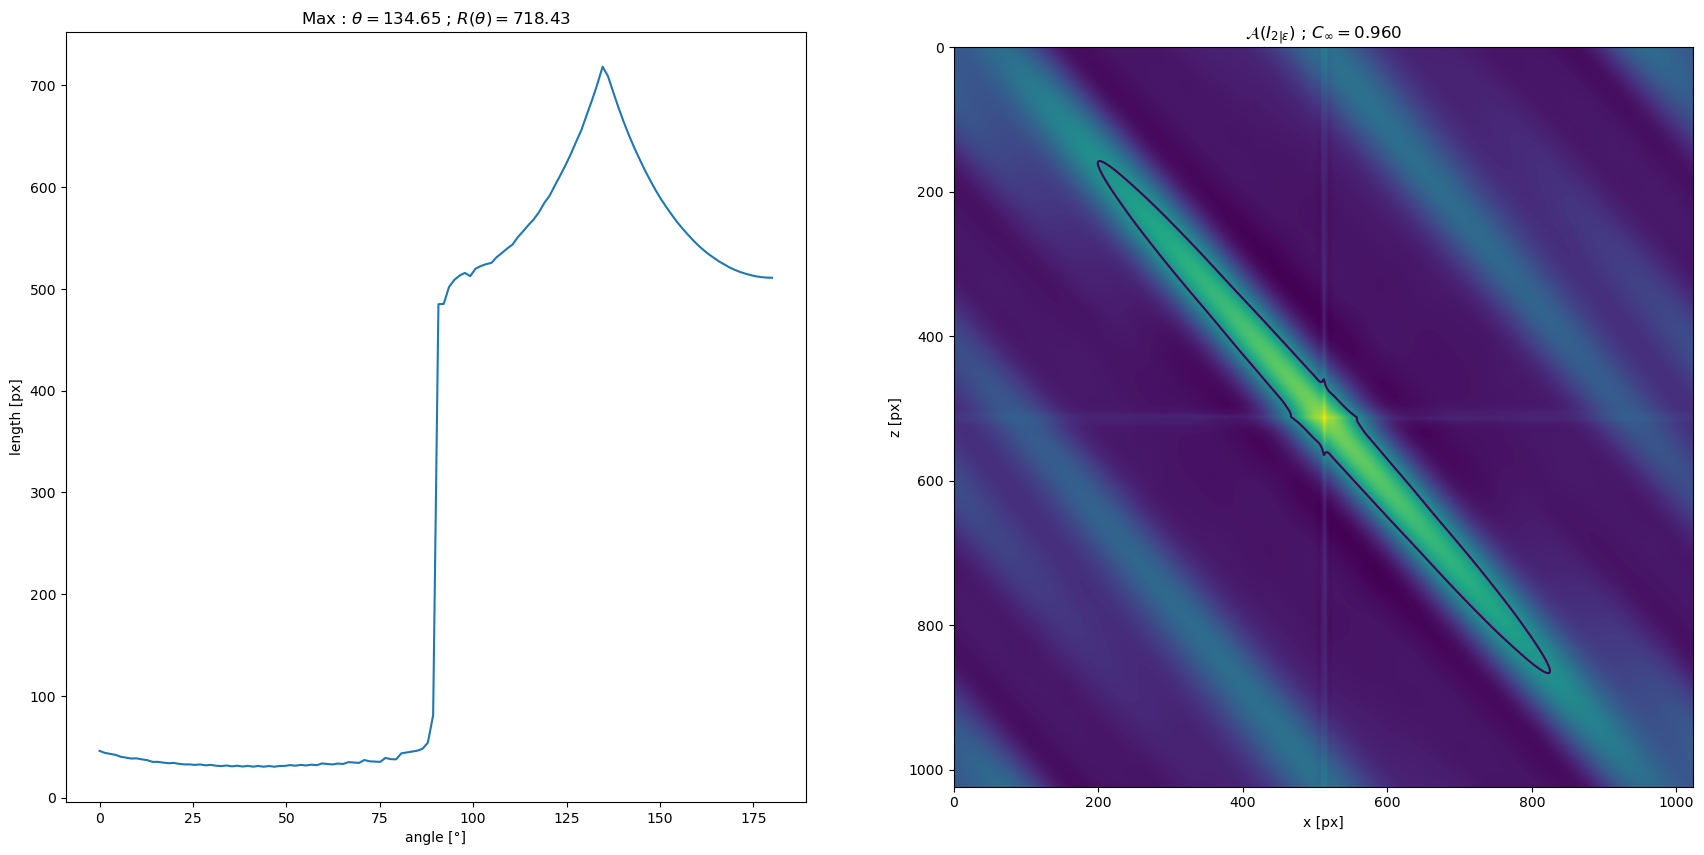

In [12]:
fig = plt.figure(figsize=(21, 10))

axe = fig.add_subplot(1, 2, 1)
axe.plot(angles*180/np.pi, length)
axe.set_xlabel("angle [°]")
axe.set_ylabel("length [px]")
axe.set_title("Max : $\\theta=$"+"{:.2f}".format(angles[length.argmax()]*180/np.pi)+" ; $R(\\theta) =$"+"{:.2f}".format(length.max()))

axe = fig.add_subplot(1, 2, 2)
axe.imshow(i2e_auto)
axe.contour(i2e_auto, [i2e_cinf, 1.])
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$\mathcal{A}(I_{2|\\varepsilon})$ ; $C_\infty =$"+"{:.3f}".format(i2e_cinf))

print(f"min  : {angles[length.argmin()]*180/np.pi} [°] ; {length.min()} [px]")
print(f"max  : {angles[length.argmax()]*180/np.pi} [°] ; {length.max()} [px]")
print(f"diff : {(angles[length.argmax()] - angles[length.argmin()])*180/np.pi}")
plt.show()

Let visualize this data on a polar plot.

[]

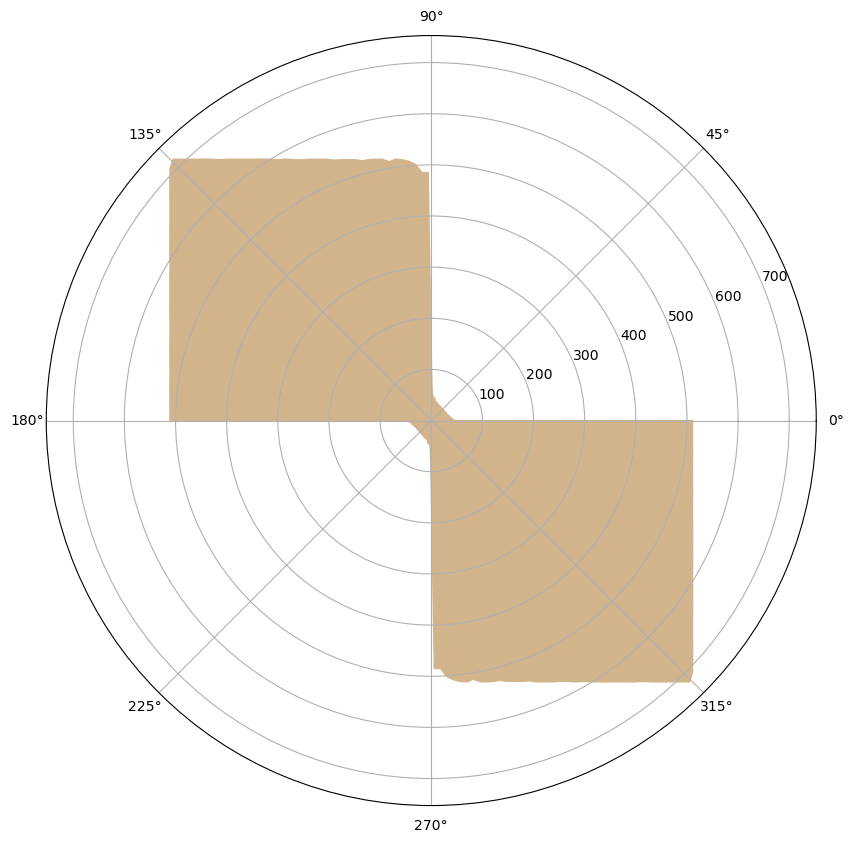

In [13]:
fangles = np.hstack((angles, np.pi+angles))
flength = np.hstack((length, length))


fig = plt.figure(figsize=(10,10))

axe = fig.add_subplot(1, 1, 1, projection="polar")
axe.fill(fangles, flength, color="tan")
axe.set_rmax(length.max())

plt.plot()